# Naive Bayes Classifier in Python
**author: Muhammad Shafa Praramadhana**

The Naïve Bayes classification algorithm is a simple and effective method for classifying data in machine learning. I use Scikit-Learn and Python to implement the Naive Bayes Classification algorithm in this kernel. I create a Naive Bayes Classifier to determine if an individual earns more than $50,000 annually.

Now, let's get going.

# 1. Introduction to Naive Bayes Classifier

Naive Bayes classifier is a probabilistic machine learning model based on Bayes Theorem. It assumes independence between feature and calculates the probability of a given input belonging to a particular class. It's widely used in text classification, spam filtering, and recommendation systems.

# 2. Naive Bayes Algorithm Intuition

The Bayes theorem is utilized by the Naïve Bayes Classifier to forecast membership probabilities for every class, including the likelihood that a given record or data point belongs to a specific class. The class that has the highest likelihood is regarded as the most probable class. A different name for this is the **Maximum A Posteriori (MAP)**.

The **MAP for a hypothesis with 2 events A and B is**

**MAP (A)**

= max (P (A | B))

= max (P (B | A) * P (A))/P (B)

= max (P (B | A) * P (A))

Here, P (B) is evidence probability. It is used to normalize the result. It remains the same, So, removing it would not affect the result.

Naïve Bayes Classifier assumes that all the features are unrelated to each other. Presence or absence of a feature does not influence the presence or absence of any other feature.

In real world datasets, we test a hypothesis given multiple evidence on features. So, the calculations become quite complicated. To simplify the work, the feature independence approach is used to uncouple multiple evidence and treat each as an independent one

# 3. Gaussian Naive Bayes Algorithm

We assumed that the values associated with each class are distributed either normally or according to a Gaussian distribution when we had continuous attribute values. Let's take an example where we have a continuous attribute x in the training data. The mean and variance of x in each class are then calculated after first segmenting the data by class. Let σi represent the variance of the values related to the ith class and µi the mean of the values. Assume that xi is an observation value. Then, the following equation can be used to calculate the probability distribution of xi given a class:

![Gaussian Naive Bayes algorithm](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQEWCcq1XtC1Yw20KWSHn2axYa7eY-a0T1TGtdVn5PvOpv9wW3FeA&s)

# 4. Import Libraries

In [150]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 5. Import Dataset

In [151]:
df = pd.read_csv('adult.csv')

# 6. Exploratory Data Analysis

To gain insight about the data, let's explore it

In [152]:
df.shape

(32561, 15)

There are 32561 instances and 15 attributes in the dataset

### View top 5 rows of dataset

In [153]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


### Rename columns names

In [154]:
col_names = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'income']

df.columns = col_names

In [155]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income'],
      dtype='object')

In [242]:
# Let's again preview the dataset
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,90,NaN,77053,HS-grad,9,Widowed,NaN,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,NaN,186061,Some-college,10,Widowed,NaN,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


We can see that the columns names are renamed.

### View summary of dataset

In [157]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


### Types of variables

I divide the dataset into numerical and categorical variables in this section. The dataset contains both numerical and category variables. The data type of categorical variables is object. The data type of numerical variables is int64.

I will examine categorical variables first.

### Explore categorical variables

In [158]:
categorical = [var for var in df.columns if df[var].dtype == 'O']

print('There are {} categorical variable\n'.format(len(categorical)))
print('The categorical variables are: \n\n', categorical)

There are 9 categorical variable

The categorical variables are: 

 ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country', 'income']


In [159]:
df[categorical].head()

,workclass,education,marital_status,occupation,relationship,race,sex,native_country,income
0,?,HS-grad,Widowed,?,Not-in-family,White,Female,United-States,<=50K
1,Private,HS-grad,Widowed,Exec-managerial,Not-in-family,White,Female,United-States,<=50K
2,?,Some-college,Widowed,?,Unmarried,Black,Female,United-States,<=50K
3,Private,7th-8th,Divorced,Machine-op-inspct,Unmarried,White,Female,United-States,<=50K
4,Private,Some-college,Separated,Prof-specialty,Own-child,White,Female,United-States,<=50K


### summary of categorical variables

*   There are 9 categorical variables.
*   The categorical variables are given by workclass, education,
marital_status, occupation, relationship, race, sex, native_country and income.
* income is the target variable.



### Missing values in categorical variables

In [160]:
df[categorical].isnull().sum()

workclass         0
education         0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
native_country    0
income            0
dtype: int64

We can see that there are no missing values in the dataset, i will confirm this further.

### Frequency counts of categorical variable

Now, i will check the frequency counts of categorical variables.

In [161]:
for var in categorical:
  print(df[var].value_counts())

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64
HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: education, dtype: int64
Married-civ-spouse       14976
Never-married            10683
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: marital_status, dtype: int64
Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         377

### View frequency distribution of categorical variable

In [162]:
for var in categorical:
  print(df[var].value_counts() / np.single(len(df)))

Private             0.697030
Self-emp-not-inc    0.078038
Local-gov           0.064279
?                   0.056386
State-gov           0.039864
Self-emp-inc        0.034274
Federal-gov         0.029483
Without-pay         0.000430
Never-worked        0.000215
Name: workclass, dtype: float64
HS-grad         0.322502
Some-college    0.223918
Bachelors       0.164461
Masters         0.052916
Assoc-voc       0.042443
11th            0.036086
Assoc-acdm      0.032769
10th            0.028654
7th-8th         0.019840
Prof-school     0.017690
9th             0.015786
12th            0.013298
Doctorate       0.012684
5th-6th         0.010227
1st-4th         0.005160
Preschool       0.001566
Name: education, dtype: float64
Married-civ-spouse       0.459937
Never-married            0.328092
Divorced                 0.136452
Separated                0.031479
Widowed                  0.030497
Married-spouse-absent    0.012837
Married-AF-spouse        0.000706
Name: marital_status, dtype: float64


As we can see, there are a number of variables with missing values, including workclass, occupation, and native_country. The missing values are typically coded as **NaN**, and Python may identify them by using the standard method df.isnull().sum().

However, in this instance, the absent values are denoted by ? Because Python does not recognize ? as a missing value, it is unable to identify these as missing values. Therefore, in order for Python to recognize these missing values, I must replace? with **NaN**.


I'll investigate these variables and swap out? for **NaN**.

### Explore missing values in variable

In [163]:
df.workclass.unique()

array(['?', 'Private', 'State-gov', 'Federal-gov', 'Self-emp-not-inc',
       'Self-emp-inc', 'Local-gov', 'Without-pay', 'Never-worked'],
      dtype=object)

In [164]:
df.workclass.value_counts()

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

We can see that there are 1836 values denoted as ? in workclass variable.

In [165]:
df.workclass.replace('?', np.NaN, inplace = True)

In [166]:
df.workclass.value_counts()

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

Now, we can see that there are no values encoded as ? in the workclass variable.

I will adopt similar approach with occupation and native_country column.

In [167]:
df.occupation.value_counts()

Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
?                    1843
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: occupation, dtype: int64

We can see that there are 1843 values encoded as ? in occupation variable

In [168]:
df.occupation.replace('?', np.NaN, inplace = True)

In [169]:
df.occupation.value_counts()

Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: occupation, dtype: int64

In [170]:
df.native_country.value_counts()

United-States                 29170
Mexico                          643
?                               583
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
Greece                      

We can see that there are 583 values encoded as ? in native_country variable

In [171]:
df.native_country.replace('?', np.NaN, inplace = True)

In [172]:
df.native_country.value_counts()

United-States                 29170
Mexico                          643
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
Greece                           29
France                      

### Check missing values in categorical variables again

In [173]:
df[categorical].isnull().sum()

workclass         1836
education            0
marital_status       0
occupation        1843
relationship         0
race                 0
sex                  0
native_country     583
income               0
dtype: int64

It is now evident that the variables workclass, occupation, and native_country have missing values.

### Number of label: cardinality

Cardinality is the number of labels in a categorical variable. High cardinality refers to a large number of labels within a variable. The machine learning model may encounter significant issues due to high cardinality. I shall thus look for high cardinality.

In [174]:
for var in categorical:
  print(var, ' contains ', len(df[var].unique()), ' labels')

workclass  contains  9  labels
education  contains  16  labels
marital_status  contains  7  labels
occupation  contains  15  labels
relationship  contains  6  labels
race  contains  5  labels
sex  contains  2  labels
native_country  contains  42  labels
income  contains  2  labels


We can see that native_country column contains relatively large number of labels as compared to other columns

### Explore numerical variables

In [175]:
numerical = [var for var in df.columns if df[var].dtype != 'O']

print('There are {} numerical variables\n'.format(len(numerical)))
print('The numerical variables are: \n\n', numerical)

There are 6 numerical variables

The numerical variables are: 

 ['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']


In [176]:
df[numerical].head()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
0,90,77053,9,0,4356,40
1,82,132870,9,0,4356,18
2,66,186061,10,0,4356,40
3,54,140359,4,0,3900,40
4,41,264663,10,0,3900,40


### Summary of numerical variables

*   There are 6 numerical variables.
*   These are given by age, fnlwgt, education_num, capital_gain, capital_loss and hours_per_week.
* All of the numerical variables are of discrete data type.



### Missing values in numerical variables

In [177]:
df[numerical].isnull().sum()

age               0
fnlwgt            0
education_num     0
capital_gain      0
capital_loss      0
hours_per_week    0
dtype: int64

We can see that all numerical variables does not contains missing values.

In [178]:
for var in numerical:
  print(var, " ", df[var].value_counts())

age   36    898
31    888
34    886
23    877
35    876
     ... 
83      6
88      3
85      3
86      1
87      1
Name: age, Length: 73, dtype: int64
fnlwgt   164190    13
203488    13
123011    13
113364    12
121124    12
          ..
183522     1
44419      1
442612     1
374833     1
257302     1
Name: fnlwgt, Length: 21648, dtype: int64
education_num   9     10501
10     7291
13     5355
14     1723
11     1382
7      1175
12     1067
6       933
4       646
15      576
5       514
8       433
16      413
3       333
2       168
1        51
Name: education_num, dtype: int64
capital_gain   0        29849
15024      347
7688       284
7298       246
99999      159
         ...  
1111         1
4931         1
7978         1
5060         1
2538         1
Name: capital_gain, Length: 119, dtype: int64
capital_loss   0       31042
1902      202
1977      168
1887      159
1485       51
        ...  
2201        1
2163        1
1944        1
1539        1
2472        1
Name: capital_los

# 7. Declare Feature Vector and Dependent Variable

In [179]:
X = df.drop(columns = 'income', axis = 1)
y = df['income']

# 8. Split Data Into Training and Test Set

In [180]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [181]:
X_train.shape, X_test.shape

((22792, 14), (9769, 14))

# 9. Feature Engineering

The act of turning unusable raw data into features that improve our understanding of our model and boost its prediction potential is known as **feature engineering**. I am going to perform feature engineering on several kinds of variables.

I'll start by showing the number and category variables separately once more.

In [182]:
X_train.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education_num      int64
marital_status    object
occupation        object
relationship      object
race              object
sex               object
capital_gain       int64
capital_loss       int64
hours_per_week     int64
native_country    object
dtype: object

In [183]:
categorical = [var for var in X_train.columns if X_train[var].dtype == 'O']
categorical

['workclass',
 'education',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native_country']

In [184]:
numerical = [var for var in X_train.columns if X_train[var].dtype != 'O']
numerical

['age',
 'fnlwgt',
 'education_num',
 'capital_gain',
 'capital_loss',
 'hours_per_week']

### Engineering missing values in categorical variables

In [185]:
X_train[categorical].isnull().sum()

workclass         1294
education            0
marital_status       0
occupation        1300
relationship         0
race                 0
sex                  0
native_country     415
dtype: int64

In [186]:
X_train[categorical].isnull().mean()

workclass         0.056774
education         0.000000
marital_status    0.000000
occupation        0.057038
relationship      0.000000
race              0.000000
sex               0.000000
native_country    0.018208
dtype: float64

In [187]:
for var in categorical:
  if X_train[var].isnull().mean() > 0:
    print(var, (X_train[var].isnull().mean()))

workclass 0.056774306774306775
occupation 0.057037557037557036
native_country 0.018208143208143207


In [188]:
for df2 in [X_train, X_test]:
  df2.workclass.fillna(X_train.workclass.mode()[0], inplace = True)
  df2.occupation.fillna(X_train.occupation.mode()[0], inplace = True)
  df2.native_country.fillna(X_train.native_country.mode()[0], inplace = True)


In [189]:
X_train[categorical].isnull().sum()

workclass         0
education         0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
native_country    0
dtype: int64

In [190]:
X_train[categorical].isnull().mean()

workclass         0.0
education         0.0
marital_status    0.0
occupation        0.0
relationship      0.0
race              0.0
sex               0.0
native_country    0.0
dtype: float64

### I will check for missing values in X_train and X_test as a final check

In [191]:
X_train.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
dtype: int64

In [192]:
X_test.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
dtype: int64

### Encode categorical variables

In [193]:
categorical

['workclass',
 'education',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native_country']

In [194]:
X_train[categorical].head()

,workclass,education,marital_status,occupation,relationship,race,sex,native_country
32098,State-gov,Bachelors,Married-civ-spouse,Exec-managerial,Wife,White,Female,United-States
25206,Local-gov,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,United-States
23491,Private,Some-college,Never-married,Exec-managerial,Not-in-family,White,Female,United-States
12367,Local-gov,HS-grad,Never-married,Farming-fishing,Own-child,White,Male,United-States
7054,Federal-gov,Masters,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States


In [195]:
!pip install category_encoders

In [196]:
import category_encoders as ce

encoder = ce.OneHotEncoder(cols = ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country'])

X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)

In [197]:
X_train.head()

,age,workclass_1,workclass_2,workclass_3,workclass_4,workclass_5,workclass_6,workclass_7,workclass_8,fnlwgt,...,native_country_32,native_country_33,native_country_34,native_country_35,native_country_36,native_country_37,native_country_38,native_country_39,native_country_40,native_country_41
32098,40,1,0,0,0,0,0,0,0,31627,...,0,0,0,0,0,0,0,0,0,0
25206,39,0,1,0,0,0,0,0,0,236391,...,0,0,0,0,0,0,0,0,0,0
23491,42,0,0,1,0,0,0,0,0,194710,...,0,0,0,0,0,0,0,0,0,0
12367,27,0,1,0,0,0,0,0,0,273929,...,0,0,0,0,0,0,0,0,0,0
7054,38,0,0,0,1,0,0,0,0,99527,...,0,0,0,0,0,0,0,0,0,0


In [198]:
X_train.shape

(22792, 105)

We can see that from the initial 14 columns, we now have 105 columns.

Similarly, I will take a look at the X_test set.

In [199]:
X_test.head()

,age,workclass_1,workclass_2,workclass_3,workclass_4,workclass_5,workclass_6,workclass_7,workclass_8,fnlwgt,...,native_country_32,native_country_33,native_country_34,native_country_35,native_country_36,native_country_37,native_country_38,native_country_39,native_country_40,native_country_41
22278,56,0,0,1,0,0,0,0,0,274475,...,0,0,0,0,0,0,0,0,0,0
8950,19,0,0,1,0,0,0,0,0,237455,...,0,0,0,0,0,0,0,0,0,0
7838,23,0,0,1,0,0,0,0,0,125491,...,0,0,0,0,0,0,0,0,0,0
16505,37,0,0,0,1,0,0,0,0,48779,...,0,0,0,0,0,0,0,0,0,0
19140,49,0,0,1,0,0,0,0,0,423222,...,0,0,0,0,0,0,0,0,0,0


In [200]:
X_test.shape

(9769, 105)

Training and testing are currently prepared for the creation of the model. We should first translate each feature variable onto a single scale. We refer to it as feature scaling. I'll carry it out as follows.

# 10. Feature Scaling

In [201]:
cols = X_train.columns

In [202]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [203]:
X_train = pd.DataFrame(X_train, columns = [cols])

In [204]:
X_test = pd.DataFrame(X_test, columns = [cols])

In [205]:
X_train.head()

,age,workclass_1,workclass_2,workclass_3,workclass_4,workclass_5,workclass_6,workclass_7,workclass_8,fnlwgt,...,native_country_32,native_country_33,native_country_34,native_country_35,native_country_36,native_country_37,native_country_38,native_country_39,native_country_40,native_country_41
0,0.15,1.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,-1.229248,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.10,0.0,1.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.483176,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.134601,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.50,0.0,1.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.797103,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.05,0.0,0.0,-1.0,1.0,0.0,0.0,0.0,0.0,-0.661406,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [206]:
X_test.head()

,age,workclass_1,workclass_2,workclass_3,workclass_4,workclass_5,workclass_6,workclass_7,workclass_8,fnlwgt,...,native_country_32,native_country_33,native_country_34,native_country_35,native_country_36,native_country_37,native_country_38,native_country_39,native_country_40,native_country_41
0,0.95,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.801669,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.90,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.492074,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.70,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.444272,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.00,0.0,0.0,-1.0,1.0,0.0,0.0,0.0,0.0,-1.085808,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.60,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.045628,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# 11. Model Training

In [207]:
from sklearn.naive_bayes import GaussianNB

classifier = GaussianNB()

classifier.fit(X_train, y_train)

GaussianNB()

# 12. Predict Result

In [208]:
y_pred = classifier.predict(X_test)

In [209]:
y_pred

array(['<=50K', '<=50K', '<=50K', ..., '<=50K', '<=50K', '>50K'],
      dtype='<U5')

### Comparing y_pred and y_test

In [210]:
print(np.concatenate((y_pred.reshape(len(y_pred), 1), y_test.values.reshape(len(y_test), 1)), 1))

[['<=50K' '<=50K']
 ['<=50K' '<=50K']
 ['<=50K' '<=50K']
 ...
 ['<=50K' '<=50K']
 ['<=50K' '<=50K']
 ['>50K' '>50K']]


# 13. Check Accuracy Score

In [211]:
from sklearn.metrics import accuracy_score

print('Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred)))

Model accuracy score: 0.8031


Here, y_test are the true class labels and y_pred are the predicted class labels in the test-set.

### Check for overfitting and underfitting

In [212]:
print('Training set score: {:.4f}'.format(classifier.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(classifier.score(X_test, y_test)))

Training set score: 0.8009
Test set score: 0.8031


The training-set accuracy score is 0.8009 while the test-set accuracy to be 0.8031. These two values are quite comparable. So, there is no sign of overfitting.

### Compare model accuracy with null accuracy

Thus, 0.8031 is the model's accuracy. However, given the accuracy mentioned above, we are unable to conclude that our model is excellent. It needs to be compared to the null accuracy. The accuracy that could be attained by consistently forecasting the most common class is known as null accuracy.

Therefore, we ought to examine the test set's class distribution first.

In [213]:
y_test.value_counts()

<=50K    7410
>50K     2359
Name: income, dtype: int64

We can see that the occurences of most frequent class is 7410. So, we can calculate null accuracy by dividing 7410 by total number of occurences.

In [214]:
null_accuracy = (7410/(7410 + 2359))

print('Null accuracy score: {0:0.4f}'.format(null_accuracy))

Null accuracy score: 0.7585


We can see that our model accuracy score is 0.8031 but null accuracy score is 0.7585. So, we can conclude that our Gaussian Naive Bayes Classification model is doing a very good job in predicting the class labels.

We can now infer that our classification model's accuracy is excellent based on the analysis above. Predicting the class labels is an area in which our model excels.

However, it withholds the underlying value distribution. Furthermore, it provides no information regarding the kinds of mistakes our classifier is making.


Confusion matrix is another useful tool that we have at our disposal.

# 14. Confusion Matrix

A confusion matrix is a tool for summarizing the performance of a classification algorithm. A confusion matrix will give us a clear picture of classification model performance and the types of errors produced by the model. It gives us a summary of correct and incorrect predictions broken down by each category. The summary is represented in a tabular form.

Four types of outcomes are possible while evaluating a classification model performance. These four outcomes are described below:-

**True Positives (TP)** – True Positives occur when we predict an observation belongs to a certain class and the observation actually belongs to that class.

**True Negatives (TN)** – True Negatives occur when we predict an observation does not belong to a certain class and the observation actually does not belong to that class.

**False Positives (FP)** – False Positives occur when we predict an observation belongs to a certain class but the observation actually does not belong to that class. This type of error is called Type I error.

**False Negatives (FN)** – False Negatives occur when we predict an observation does not belong to a certain class but the observation actually belongs to that class. This is a very serious error and it is called Type II error.

These four outcomes are summarized in a confusion matrix given below.

In [215]:
from sklearn.metrics import confusion_matrix

matrix = confusion_matrix(y_test, y_pred)

In [216]:
TP = matrix[0][0]
TN = matrix[1][1]
FP = matrix[0][1]
FN = matrix[1][0]

print('Confusion matrix: \n\n', matrix)
print('\nTrue Positive (TP): ', TP)
print('\nTrue Negative (TN): ', TN)
print('\nFalse Positive (FP): ', FP)
print('\nFalse Negative (FN): ', FN)

Confusion matrix: 

 [[5953 1457]
 [ 467 1892]]

True Positive (TP):  5953

True Negative (TN):  1892

False Positive (FP):  1457

False Negative (FN):  467


The confusion matrix shows 5953 + 1892 = 7845 correct predictions and 1457 + 467 = 1924 incorrect predictions.

In this case, we have

*   True Positives (Actual Positive:1 and Predict Positive:1) - 5953
*   True Negatives (Actual Negative:0 and Predict Negative:0) - 1892
* False Positives (Actual Negative:0 but Predict Positive:1) - 1457 (Type I error)
* False Negatives (Actual Positive:1 but Predict Negative:0) - 467 (Type II error)

<Axes: >

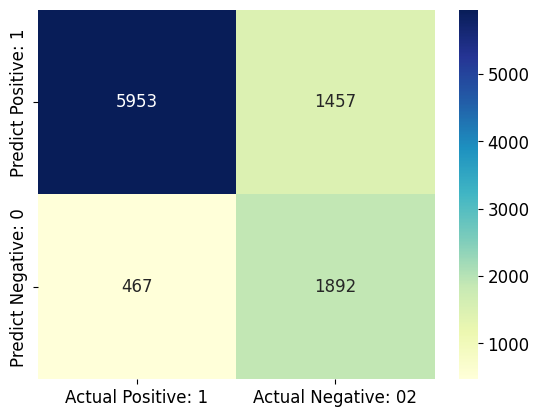

In [217]:
cm_matrix = pd.DataFrame(data = matrix, columns = ['Actual Positive: 1', 'Actual Negative: 02'], index = ['Predict Positive: 1', 'Predict Negative: 0'])

sns.heatmap(cm_matrix, annot = True, fmt = 'd', cmap = 'YlGnBu')

# 15. Classification metrices

### Classification Report
**Classification report** is another way to evaluate the classification model performance. It displays the **precision, recall, f1 and support scores** for the model. I have described these terms in later.

We can print a classification report as follows:-

In [218]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       <=50K       0.93      0.80      0.86      7410
        >50K       0.56      0.80      0.66      2359

    accuracy                           0.80      9769
   macro avg       0.75      0.80      0.76      9769
weighted avg       0.84      0.80      0.81      9769



In [219]:
classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy: {0:0.4f}'.format(classification_accuracy))

Classification accuracy: 0.8031


In [220]:
classification_error = (FP + FN) / float(TP + TN + FP + FN)

print('Classification error: {0:0.4f}'.format(classification_error))

Classification error: 0.1969


### Precision

**Precision** can be defined as the percentage of correctly predicted positive outcomes out of all the predicted positive outcomes. It can be given as the ratio of true positives (TP) to the sum of true and false positives (TP + FP).

So, **Precision** identifies the proportion of correctly predicted positive outcome. It is more concerned with the positive class than the negative class.

Mathematically, **precision** can be defined as the ratio of TP to (TP + FP).

In [221]:
precision_score = TP / float(TP + FP)

print('Precision score: {0:0.4f}'.format(precision_score))

Precision score: 0.8034


### Recall

Recall can be defined as the percentage of correctly predicted positive outcomes out of all the actual positive outcomes. It can be given as the ratio of true positives (TP) to the sum of true positives and false negatives (TP + FN). Recall is also called Sensitivity.

Recall identifies the proportion of correctly predicted actual positives.

Mathematically, recall can be given as the ratio of TP to (TP + FN).

In [222]:
recall = TP / float(TP + FN)

print('Recall: {0:0.4f}'.format(recall))

Recall: 0.9273


### f1-score

The weighted harmonic mean of recall and precision is known as the f1-score. F1-scores can range from 0.0 to 1.0, with 1.0 being the best attainable score. The harmonic mean of recall and precision is known as the f1-score. Because accuracy measures incorporate precision and recall into their computation, the f1-score is always lower than those measures. Comparing classifier models should be done using the weighted average of the f1-score rather than the global accuracy.

# 16. Calculate Class Probabilites

In [223]:
y_pred_prob = classifier.predict_proba(X_test)[0:10]

In [224]:
y_pred_prob

array([[9.99999693e-01, 3.06618197e-07],
       [1.00000000e+00, 1.02355439e-10],
       [9.99999997e-01, 3.02850706e-09],
       [8.78002299e-04, 9.99121998e-01],
       [7.55021219e-04, 9.99244979e-01],
       [9.99505992e-01, 4.94008099e-04],
       [9.99999697e-01, 3.03376335e-07],
       [9.63760637e-01, 3.62393626e-02],
       [9.99999937e-01, 6.31028512e-08],
       [1.41650243e-03, 9.98583498e-01]])

### Observations


- In each row, the numbers sum to 1.


- There are 2 columns which correspond to 2 classes - `<=50K` and `>50K`.

    - Class 0 => <=50K - Class that a person makes less than equal to 50K.    
    
    - Class 1 => >50K  - Class that a person makes more than 50K.
        
    
- Importance of predicted probabilities

    - We can rank the observations by probability of whether a person makes less than or equal to 50K or more than 50K.


- predict_proba process

    - Predicts the probabilities    
    
    - Choose the class with the highest probability    
    
    
- Classification threshold level

    - There is a classification threshold level of 0.5.    
    
    - Class 0 => <=50K - probability of salary less than or equal to 50K is predicted if probability < 0.5.    
    
    - Class 1 => >50K - probability of salary more than 50K is predicted if probability > 0.5.    

In [225]:
y_pred_prob_df = pd.DataFrame(data = y_pred_prob, columns = ['Prob of - <=50K', 'Prob of - >50K'])

In [226]:
y_pred_prob_df

,Prob of - <=50K,Prob of - >50K
0,1.000000,3.066182e-07
1,1.000000,1.023554e-10
2,1.000000,3.028507e-09
3,0.000878,9.991220e-01
4,0.000755,9.992450e-01
5,0.999506,4.940081e-04
6,1.000000,3.033763e-07
7,0.963761,3.623936e-02
8,1.000000,6.310285e-08
9,0.001417,9.985835e-01


In [227]:
classifier.predict_proba(X_test)[0:10, 1]

array([3.06618197e-07, 1.02355439e-10, 3.02850706e-09, 9.99121998e-01,
       9.99244979e-01, 4.94008099e-04, 3.03376335e-07, 3.62393626e-02,
       6.31028512e-08, 9.98583498e-01])

In [228]:
y_pred1 = classifier.predict_proba(X_test)[:, 1]

In [229]:
y_pred1

array([3.06618197e-07, 1.02355439e-10, 3.02850706e-09, ...,
       1.06992374e-06, 4.56195592e-09, 9.52312300e-01])

Text(0, 0.5, 'Frequency')

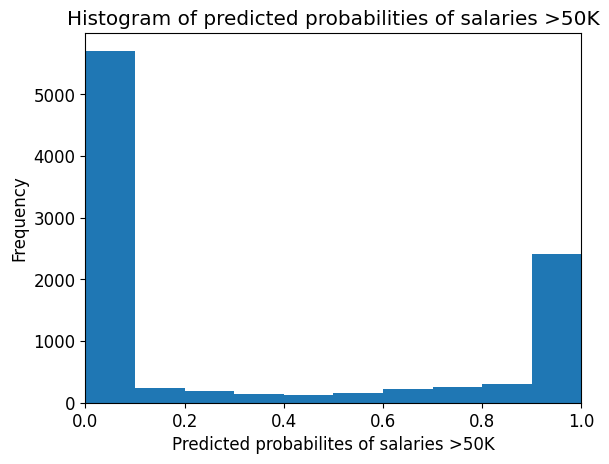

In [230]:
plt.rcParams['font.size'] = 12
plt.hist(y_pred1, bins = 10)
plt.title('Histogram of predicted probabilities of salaries >50K')

plt.xlim(0, 1)

plt.xlabel('Predicted probabilites of salaries >50K')
plt.ylabel('Frequency')

### Observations


- We can see that the above histogram is highly positive skewed.


- The first column tell us that there are approximately 5700 observations with probability between 0.0 and 0.1 whose salary
  is <=50K.


- There are relatively small number of observations with probability > 0.5.


- So, these small number of observations predict that the salaries will be >50K.


- Majority of observations predcit that the salaries will be <=50K.

# 17. ROC - AUC

### ROC Curve
Another tool to measure the classification model performance visually is ROC Curve. ROC Curve stands for Receiver Operating Characteristic Curve. An ROC Curve is a plot which shows the performance of a classification model at various classification threshold levels.

The ROC Curve plots the True Positive Rate (TPR) against the False Positive Rate (FPR) at various threshold levels.

True Positive Rate (TPR) is also called Recall. It is defined as the ratio of TP to (TP + FN).

False Positive Rate (FPR) is defined as the ratio of FP to (FP + TN).

In the ROC Curve, we will focus on the TPR (True Positive Rate) and FPR (False Positive Rate) of a single point. This will give us the general performance of the ROC curve which consists of the TPR and FPR at various threshold levels. So, an ROC Curve plots TPR vs FPR at different classification threshold levels. If we lower the threshold levels, it may result in more items being classified as positve. It will increase both True Positives (TP) and False Positives (FP).

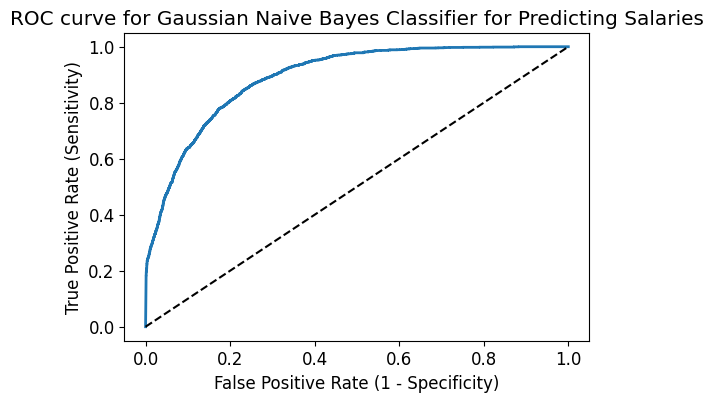

In [231]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred1, pos_label = '>50K')
plt.figure(figsize = (6, 4))
plt.plot(fpr, tpr, linewidth = 2)
plt.plot([0, 1], [0, 1], 'k--')

plt.rcParams['font.size'] = 12
plt.title('ROC curve for Gaussian Naive Bayes Classifier for Predicting Salaries')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()

ROC curve help us to choose a threshold level that balances sensitivity and specificity for a particular context.

### ROC AUC

ROC AUC stands for Receiver Operating Characteristic - Area Under Curve. It is a technique to compare classifier performance. In this technique, we measure the area under the curve (AUC). A perfect classifier will have a ROC AUC equal to 1, whereas a purely random classifier will have a ROC AUC equal to 0.5.

So, ROC AUC is the percentage of the ROC plot that is underneath the curve.

In [232]:
from sklearn.metrics import roc_auc_score

ROC_AUC = roc_auc_score(y_test, y_pred1)
print('ROC_AUC: {:.4f}'.format(ROC_AUC))

ROC_AUC: 0.8909


### Interpretation

* ROC AUC is a single number summary of classifier performance. The higher the value, the better the classifier.
* ROC AUC of our model approaches towards 1. So, we can conclude that our classifier does a good job in predicting whether it will rain tomorrow or not.

In [234]:
from sklearn.model_selection import cross_val_score

cross_validated_ROC_AUC = cross_val_score(classifier, X_train, y_train, cv=5, scoring = 'roc_auc').mean()
print('Cross Validated ROC AUC: {:.4f}'.format(cross_validated_ROC_AUC))

Cross Validated ROC AUC: 0.8936


In [239]:
scores = cross_val_score(classifier, X_train, y_train, cv = 10, scoring = 'accuracy')
print('Cross-Validation scores: {}'.format(scores))

Cross-Validation scores: [0.80701754 0.7877193  0.79947345 0.81439228 0.785871   0.81526986
 0.78894252 0.79420799 0.80122861 0.8056165 ]


In [241]:
print('Average cross-validation score: {:.4f}'.format(scores.mean()))

Average cross-validation score: 0.8000


### Interpretation

* Using the mean cross-validation, we can conclude that we expect the model to be around 80.63% accurate on average.

* If we look at all the 10 scores produced by the 10-fold cross-validation, we can also conclude that there is a relatively small variance in the accuracy between folds, ranging from 81.35% accuracy to 79.64% accuracy. So, we can conclude that the model is independent of the particular folds used for training.

* Our original model accuracy is 0.8083, but the mean cross-validation accuracy is 0.8063. So, the 10-fold cross-validation accuracy does not result in performance improvement for this model.